***Importing Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
# pd.set_option('display.max_rows', None)

***Exploratory Data Analysis (EDA):***

In [2]:
customers_data = pd.read_csv("customer_segmentation.csv")

In [3]:
customers_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [4]:
# Check the shape of the dataset
print("Shape of dataset:", customers_data.shape)

# Check basic information
print("\nDataset Info:")
print(customers_data.info())

# Check for missing values
print("\nMissing values:\n", customers_data.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", customers_data.duplicated().sum())

Shape of dataset: (2240, 29)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  

In [5]:
# Get summary statistics for numerical columns
print("\nSummary Statistics:")
customers_data.describe()


Summary Statistics:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
# Analyze categorical columns
print("\nUnique values in categorical columns:")
for col in ['Education', 'Marital_Status']:
    print(f"{col}: {customers_data[col].unique()}")


Unique values in categorical columns:
Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


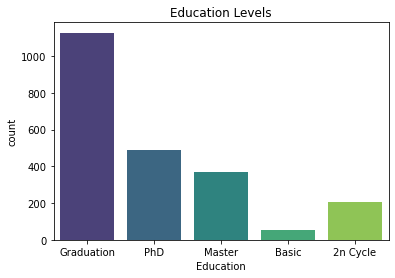

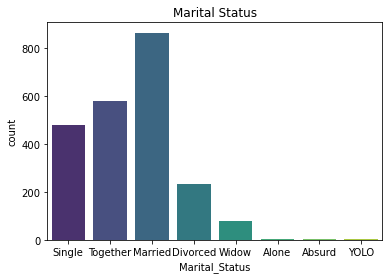

In [7]:
# Bar plot for Education
plt.figure(figsize=(6, 4))
sns.countplot(data=customers_data, x='Education', palette='viridis')
plt.title("Education Levels")
plt.show()

# Bar plot for Marital Status
plt.figure(figsize=(6, 4))
sns.countplot(data=customers_data, x='Marital_Status', palette='viridis')
plt.title("Marital Status")
plt.show()

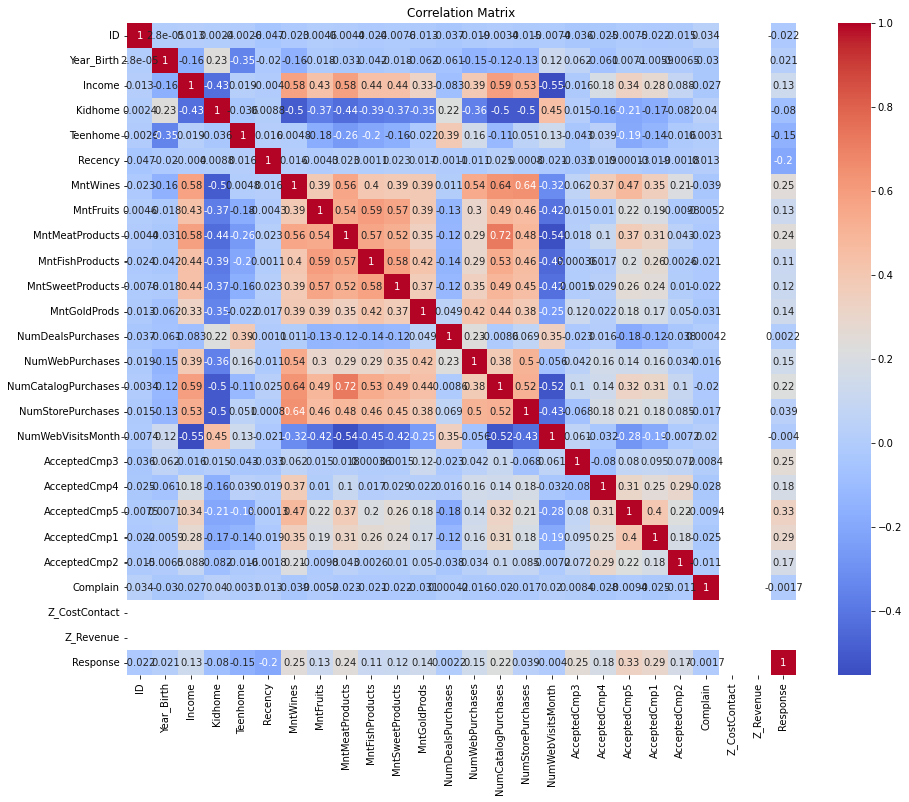

In [8]:
# Correlation matrix
plt.figure(figsize=(15, 12))
corr_matrix = customers_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

***PreProcessing***

In [9]:
# Fill missing values in the Income column with the median
customers_data['Income'].fillna(customers_data['Income'].median(), inplace=True)

# Verify that no missing values remain
print("Missing values in Income column:\n", customers_data["Income"].isnull().sum())

Missing values in Income column:
 0


In [10]:
# Encode categorical variables
categorical_cols = ['Education', 'Marital_Status']
le = LabelEncoder()
for col in categorical_cols:
    customers_data[col] = le.fit_transform(customers_data[col])

# Verify the encoding
customers_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [11]:
# Drop irrelevant columns
customers_data = customers_data.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1)

In [12]:
# Add a Family_Size feature
customers_data['Family_Size'] = customers_data['Kidhome'] + customers_data['Teenhome'] + 2

# Add a Total_Spent feature
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
customers_data['Total_Spent'] = customers_data[spending_cols].sum(axis=1)

# Verify new features
customers_data[['Family_Size', 'Total_Spent']].head()

# drop features
customers_data = customers_data.drop(spending_cols, axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
                'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Family_Size', 'Total_Spent']

# Apply StandardScaler
scaler = StandardScaler()
customers_data[numeric_cols] = scaler.fit_transform(customers_data[numeric_cols])

# Verify scaling
customers_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Family_Size,Total_Spent
0,1957,2,4,0.235696,-0.825218,-0.929894,0.307039,0.349414,1.409304,2.510890,-0.550785,0.693904,0,0,0,0,0,0,1,-1.264505,1.679417
1,1954,2,4,-0.235454,1.032559,0.906934,-0.383664,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,0,0,0,0,0,0,0,1.396361,-0.961275
2,1965,2,5,0.773999,-0.825218,-0.929894,-0.798086,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0,0,0,0,0,0,0,-1.264505,0.282673
3,1984,2,5,-1.022355,1.032559,-0.929894,-0.798086,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,0,0,0,0,0,0,0,0.065928,-0.918094
4,1981,4,3,0.241888,1.032559,-0.929894,1.550305,1.384715,0.329427,0.115638,0.064556,-0.130463,0,0,0,0,0,0,0,0.065928,-0.305254


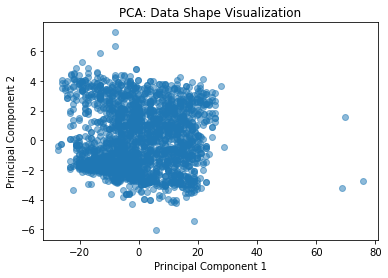

In [29]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(customers_data)

# Scatter plot of reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.title("PCA: Data Shape Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

***Building the K-Means algorithm***

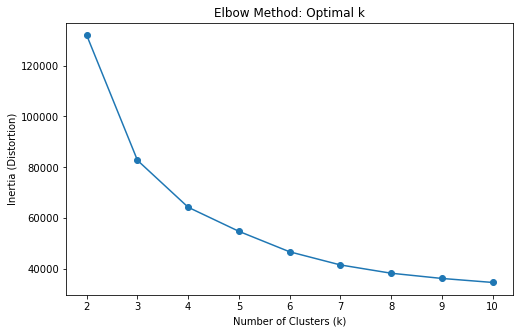

In [15]:
# Elbow method to find the optimal number of clusters
distortions = []
K = range(2, 11)  # Test for 2 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_data)
    distortions.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.title('Elbow Method: Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Distortion)')
plt.show()

In [25]:
# Test k=4
kmeans_2 = KMeans(n_clusters=2, random_state=42)
clusters_2 = kmeans_2.fit_predict(customers_data)

# Test k=5
kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(customers_data)

In [26]:
# Calculate Silhouette Score for k=4
sil_score_2 = silhouette_score(customers_data, clusters_2)
print("Silhouette Score for k=2:", sil_score_2)

# Calculate Silhouette Score for k=5
sil_score_3 = silhouette_score(customers_data, clusters_3)
print("Silhouette Score for k=3:", sil_score_3)

Silhouette Score for k=2: 0.5125157865862497
Silhouette Score for k=3: 0.42436610916992357


***Building the DBSCAN algorithm***

In [30]:
# Compute k-distance for k=5 (min_samples)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(customers_data)
distances, indices = neighbors_fit.kneighbors(customers_data)

# Sort distances and plot
distances = np.sort(distances[:, 4])  # 4th neighbor distance
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title("k-Distance Graph")
plt.xlabel("Points sorted by distance to 5th nearest neighbor")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

EPS: 4.5, Min_Samples: 2 -> Clusters: 2, Noise: 23, Silhouette Score: 0.209
EPS: 4.0, Min_Samples: 2 -> Clusters: 3, Noise: 29, Silhouette Score: 0.146
EPS: 3.0, Min_Samples: 6 -> Clusters: 2, Noise: 278, Silhouette Score: 0.042
EPS: 3.0, Min_Samples: 8 -> Clusters: 3, Noise: 326, Silhouette Score: 0.032
EPS: 3.0, Min_Samples: 9 -> Clusters: 3, Noise: 374, Silhouette Score: 0.019
EPS: 3.0, Min_Samples: 7 -> Clusters: 5, Noise: 298, Silhouette Score: -0.188
EPS: 1.0, Min_Samples: 5 -> Clusters: 3, Noise: 2225, Silhouette Score: -0.199
EPS: 3.5, Min_Samples: 3 -> Clusters: 2, Noise: 59, Silhouette Score: -0.201
EPS: 3.0, Min_Samples: 5 -> Clusters: 3, Noise: 259, Silhouette Score: -0.210
EPS: 3.0, Min_Samples: 4 -> Clusters: 2, Noise: 234, Silhouette Score: -0.256


In [31]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define ranges for eps and min_samples
eps_values = np.arange(0.5, 5.5, 0.5)  # Adjust step size as needed
min_samples_values = range(2, 10)

# Dictionary to store results
results = {}

# Tune eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        db_clusters = dbscan.fit_predict(customers_data)
        
        # Count clusters (excluding noise) and noise points
        num_clusters = len(set(db_clusters)) - (1 if -1 in db_clusters else 0)
        noise_points = list(db_clusters).count(-1)
        
        # Calculate silhouette score only if clusters are formed
        if num_clusters > 1:
            sil_score = silhouette_score(customers_data, db_clusters)
        else:
            sil_score = -1  # Invalid Silhouette Score for no valid clustering
        
        # Store results
        results[(eps, min_samples)] = {
            "clusters": num_clusters,
            "noise": noise_points,
            "silhouette_score": sil_score
        }

# Print results sorted by the highest silhouette score
sorted_results = sorted(results.items(), key=lambda x: x[1]["silhouette_score"], reverse=True)
for params, metrics in sorted_results[:10]:  # Top 10 results
    print(f"EPS: {params[0]}, Min_Samples: {params[1]} -> Clusters: {metrics['clusters']}, Noise: {metrics['noise']}, Silhouette Score: {metrics['silhouette_score']:.3f}")

EPS: 4.5, Min_Samples: 2 -> Clusters: 2, Noise: 23, Silhouette Score: 0.209
EPS: 4.0, Min_Samples: 2 -> Clusters: 3, Noise: 29, Silhouette Score: 0.146
EPS: 3.0, Min_Samples: 6 -> Clusters: 2, Noise: 278, Silhouette Score: 0.042
EPS: 3.0, Min_Samples: 8 -> Clusters: 3, Noise: 326, Silhouette Score: 0.032
EPS: 3.0, Min_Samples: 9 -> Clusters: 3, Noise: 374, Silhouette Score: 0.019
EPS: 3.0, Min_Samples: 7 -> Clusters: 5, Noise: 298, Silhouette Score: -0.188
EPS: 1.0, Min_Samples: 5 -> Clusters: 3, Noise: 2225, Silhouette Score: -0.199
EPS: 3.5, Min_Samples: 3 -> Clusters: 2, Noise: 59, Silhouette Score: -0.201
EPS: 3.0, Min_Samples: 5 -> Clusters: 3, Noise: 259, Silhouette Score: -0.210
EPS: 3.0, Min_Samples: 4 -> Clusters: 2, Noise: 234, Silhouette Score: -0.256
